<h1><b>Plot with Pandas: Python Data Visualization Basics</b></h1>
<p>In this notebook, I will be covering an important concept that users must know once they get acquainted with Pandas: the <code>SettingWithCopyWarning</code> issue. As a beginner, I would often disregard this sign as the outcome of the code would not necessarily change (apparently). Now, there are <b>shallow copies</b> and <b>deep copies</b>, notions that are related to the aforementioned warning. I'll discuss the difference between these concepts as well as assessing the impact of their use in data analysis.</p>
<p>By the end of this notebook, I hope to have covered the following topics:</p>
<ul>
    <li>The definition of <b>views</b> and <b>copies</b> in NumPy and Pandas</li>
    <li>How to work with views and copies in these libraries</li>
    <li>Why <code>SettingWithCopyWarning</code> happens in Pandas</li>
    <li>How to avoid getting a <code>SettingWithCopyWarning</code> in Pandas</li>
</ul>

<h2><b>Table of contents:</b></h2>
<ul>
    <li>Example of a <code>SettingWithCopyWarning</code></li>
    <li>Views and Copies in NumPy and Pandas</li>
        <ul>
            <li>Understanding views and copies in NumPy</li>
            <li>Understanding views and copies in Pandas</li>
        </ul>
    <li>Indices and Slices in NumPy and Pandas</li>
        <ul>
            <li>Indexing in NumPy: copies and views</li>
            <li>Indexing in Pandas: copies and views</li>
        </ul>
<li>Use of Views and Copies in Pandas</li>
    <ul>
        <li>Chained Indexing and <code>SettingWithCopyWarning</code></li>
        <li>Impact of Data Types on Views, Copies, and the <code>SettingWithCopyWarning</code></li>
        <li>Hierarchical Indexing and <code>SettingWithCopyWarning</code></li>
    </ul>
<li>Change the Default <code>SettingWithCopyWarning</code> Behavior</li>
<li>Conclusion</li>
</ul>

<p>Let's start by importing the required modules and checking their versions. Then, we can move on and proceed with our discussion on this notebook's topic.</p>



<h2><b>1. Setting Up your Environment</b></h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = ("https://raw.githubusercontent.com/fivethirtyeight/"
                "data/master/college-majors/recent-grads.csv")

In [3]:
df = pd.read_csv(url)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
pd.set_option("display.max.columns", None)

In [6]:
df.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,2924,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,1085,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,71298,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,55450,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


<h2><b>2. Create your First Pandas Plot</b></h2>

<p>The matplotlib magic command sets up your notebook for displaying plots in your output. The <i>inline</i> sets the charts to be plotted in the output of the notebook.</p>

In [7]:
%matplotlib

Using matplotlib backend: <object object at 0x0000013BA24D51B0>


In [8]:
%matplotlib inline

<Axes: xlabel='Rank'>

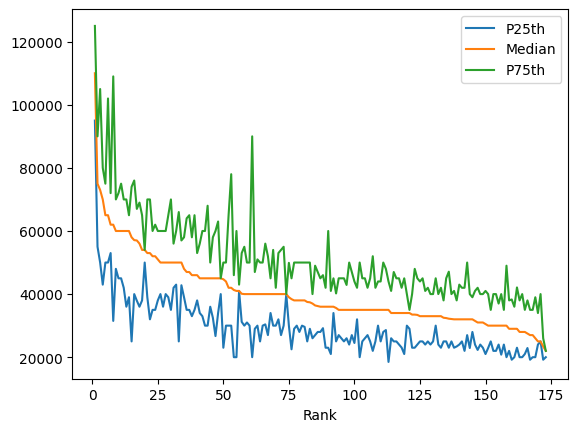

In [9]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"])

<p>The x-axis represent the rank of each institution, while <code>P25th</code>, <code>Median</code>, and <code>P75th</code> are represented on the y-axis.</p>
<p><b>Note</b>: to display the plot in a python shell, you must call <code>plt.show()</code> to display the plot.</p>
<p>Observations on the plot:</p>
<ul>
    <li>The median income <i>decreases</i> as the rank decreases. This is expected, as the rank is determined by the median income.</li>
    <li>Some majors have <b>large gaps</b> between the 25th and the 75h percentiles. Earnings can therefore be much higher or lower than the medium income. Other majors, in contrast, present narrow gaps between the percentiles. Salaries here are very close to the median.</li>
    <ul>
        <li>This means that some majors have a wide range of earnings, while others present a narrower range.</li>
    </ul>
</ul>
<p><code>.plot()</code> has several parameters for different chart types. Check the documentation. The default is <code>"line"</code>. If you don't provide a parameter to <code>.plot()</code>, then the <b>index</b> will be used for the <b>x-axis</b> and <b>all numeric columns</b> on the <b>y-axis</b>, which can get messy if you have too many numerical variables.<p>
<p>Also, DataFrame objects have several methods that you can use to create various charts: <code>df.plot(kind="bar")</code> or <code>df.plot.bar()</code>, for instance.</p>
<hr>
<h2><b>3. Under the Hood: Matplotlib</b><h2>


In [11]:
import matplotlib.pyplot as plt

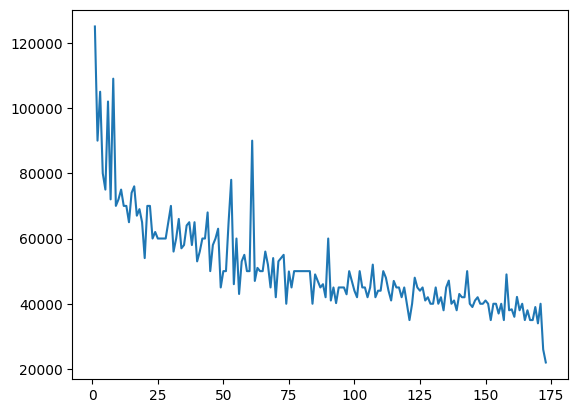

In [12]:
plt.plot(df["Rank"], df["P75th"])

<Axes: xlabel='Rank'>

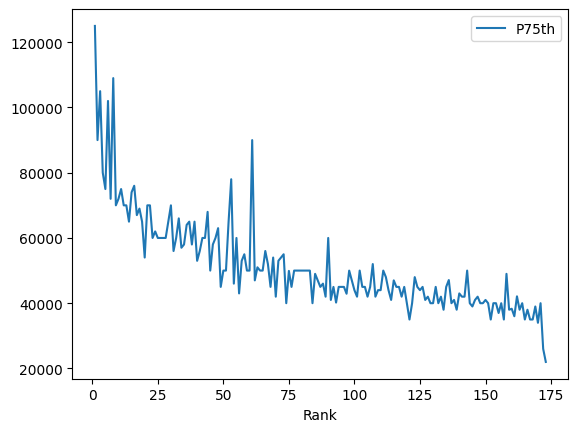

In [13]:
df.plot(x="Rank", y="P75th")

<hr>
<h2><b>4. Survey your Data</b></h2>

In [14]:
median_column = df["Median"]

In [15]:
type(median_column)

pandas.core.series.Series

<Axes: ylabel='Frequency'>

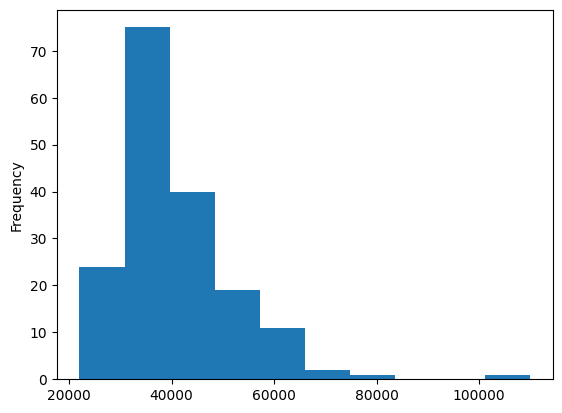

In [16]:
median_column.plot(kind="hist")

In [17]:
top_5 = df.sort_values(by="Median", ascending=False).head()

In [18]:
top_5

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


<Axes: xlabel='Major'>

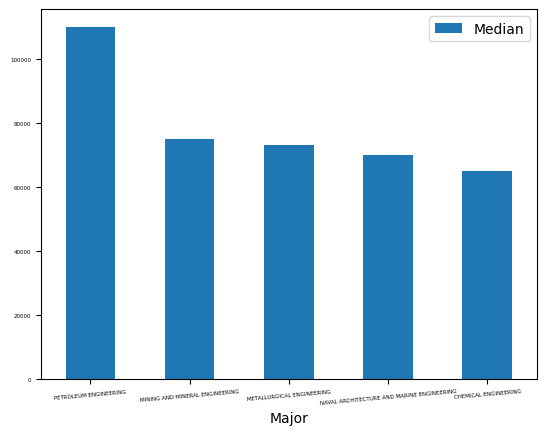

In [30]:
top_5.plot(kind="bar", x="Major", y="Median", rot=5, fontsize=4)